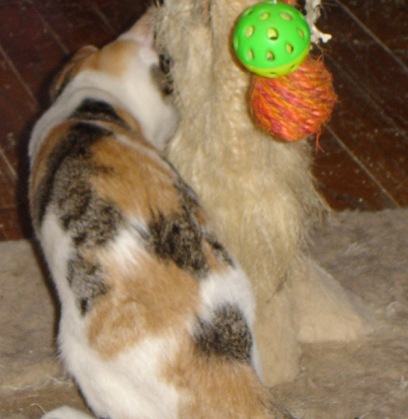

In [2]:
from IPython.display import Image

Image(filename = '../dataset_treino/cat/12499.jpg')


In [3]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.9.1


In [4]:
import keras as k
print("Versão do Keras:", k.__version__)

Versão do Keras: 2.9.0


In [5]:
#imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
#Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [7]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [8]:
#Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
#Adicionando segunda camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [10]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
#Passo 3 - Flattening
classifier.add(Flatten())

In [12]:
#Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [13]:
#compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
metrics = ['accuracy'])

In [14]:
#Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('../dataset_treino', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('../dataset_validation', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [28]:
#Executando o treinamento
classifier.fit(training_set, steps_per_epoch = 8000, epochs = 5, validation_data = validation_set, validation_steps = 2000)

ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

In [1]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('../dataset_teste/9.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='../dataset_teste/9.jpg')

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'